In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
from sklearn.preprocessing import normalize
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet


In [6]:
df = pd.read_csv('../Datasets/df_all_linkedin.csv', index_col=0)
df_co = pd.read_csv('../Datasets/df_linkedin_Colorado.csv', index_col=0)

In [7]:
descriptions_co = df_co['Description'].values

In [8]:
descriptions = df['Description'].values


In [5]:
# descriptions

In [10]:
stopWords = set(stopwords.words('english'))
add_stopwords = {
    'join', 'work', 'team', 'future', 'digital', 'technology', 'access', 'leader', 'industry', 'history', 'innovation',
    'year', 'customer', 'focused', 'leading', 'business', 'ability', 'country', 'employee', 'www', 'seeking',
    'location', 'role', 'responsible', 'designing', 'code', 'ideal', 'candidate', 'also', 'duty', 'without', 'excellent',
    'set', 'area', 'well', 'use', 'strong', 'self', 'help', 'diverse', 'every', 'day', 'equal', 'employment', 'opportunity',
    'affirmative', 'action', 'employer', 'diversity', 'qualified', 'applicant', 'receive', 'consideration', 'regard',
    'race', 'color', 'religion', 'sex', 'national', 'origin', 'status', 'age', 'sexual', 'orientation', 'gender',
    'identity', 'disability', 'marital', 'family', 'medical', 'protected', 'veteran', 'reasonable', 'accomodation',
    'protect', 'status', 'equal', 'discriminate', 'inclusive', 'diverse'
}
stopWords_full = stopWords.union(add_stopwords)


In [7]:
print(stopWords_full)

{'am', 'those', 'set', 'off', 'few', 'and', 'they', 'll', "isn't", "she's", 'having', 'before', 'above', 'it', 'action', 'work', 'any', 'over', 'of', 'nor', 'ability', 'again', 'their', 'for', 'hers', "couldn't", 'veteran', 'ourselves', "doesn't", 'discriminate', 'once', 'ideal', 'responsible', 'consideration', 'age', 'to', 'customer', 'me', 'couldn', 'why', 'her', 'down', 'this', "you'd", 'its', 'hasn', "hasn't", 'won', 'is', "hadn't", 'equal', 'she', 'gender', 'self', 'be', "wasn't", 'don', 'sexual', 'hadn', 'had', 'both', 'your', 'wouldn', 'applicant', 'duty', 'from', 'qualified', 'itself', 'have', 'just', "won't", 'day', 'digital', 'at', 'does', 'very', 'sex', 'designing', 'while', 'ma', 'without', 'diverse', 'an', 'should', 'religion', "shouldn't", 'd', 'employee', 'now', 'our', 'no', 'reasonable', 'such', 's', 'through', 'with', 'access', 'out', 'didn', 'or', "aren't", 'more', 'until', 'which', 'history', 'up', 'them', 'himself', 'disability', 'where', 'during', 'doing', "don't",

In [11]:
tokenize_remove_punct = RegexpTokenizer(r'\w+')
lemma = WordNetLemmatizer()



def remove_stopwords(descriptions):
    cleaned_descriptions = []
    for description in descriptions:
        temp_list = []
        for word in description.split():
            if word.lower() not in stopWords_full:
                temp_list.append(word.lower())
        cleaned_descriptions.append(' '.join(temp_list))
    return np.array(cleaned_descriptions)

def remove_punctuation(reg_tokenizer, descriptions):
    no_punct_descriptions = []
    for description in descriptions:
        description_no_punct = ' '.join(reg_tokenizer.tokenize(description))
        no_punct_descriptions.append(description_no_punct)
    return np.array(no_punct_descriptions)

def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {'J': wordnet.ADJ,
               'N': wordnet.NOUN,
               'V': wordnet.VERB,
               'R': wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize_descriptions(lemmatizer, descriptions):
    cleaned_descriptions = []
    for description in descriptions:
        temp_list = []
        for word in description.split():
            cleaned_word = lemmatizer.lemmatize(word, get_wordnet_pos(word))
            temp_list.append(cleaned_word)
#         cleaned_description = ' '.join(temp_list)
        cleaned_descriptions.append(' '.join(temp_list))
    return np.array(cleaned_descriptions)

# descriptions_no_sw = remove_stopwords(stopWords, descriptions)
# descriptions_no_sw_punct = remove_punctuation(tokenize_remove_punct, descriptions_no_sw)
# cleaned_descriptions = lemmatize_descriptions(lemma, descriptions_no_sw_punct)


# tokenize_remove_punct = RegexpTokenizer(r'\w+')
# lemma = WordNetLemmatizer()
# lemmatized_descriptions = []
# for description in descriptions:
#     description_no_punct = tokenize_remove_punct.tokenize(description)
#     temp_list = []
#     for word in description_no_punct:
#         lemmatized_word = lemma.lemmatize(word)
#         temp_list.append(lemmatized_word.lower())
#     lemmatized_description = ' '.join(temp_list)
#     lemmatized_descriptions.append(lemmatized_description)

# cleaned_descriptions = np.array(lemmatized_descriptions)
# len(descriptions_no_sw_punct)

In [30]:
descriptions_no_sw_co = remove_stopwords(descriptions_co)
descriptions_no_sw_punct_co = remove_punctuation(tokenize_remove_punct, descriptions_no_sw_co)
cleaned_descriptions_co = lemmatize_descriptions(lemma, descriptions_no_sw_punct_co)

In [12]:
descriptions_no_punct = remove_punctuation(tokenize_remove_punct, descriptions)
descriptions_no_punct_sw = remove_stopwords(descriptions_no_punct)
cleaned_descriptions = lemmatize_descriptions(lemma, descriptions_no_punct_sw)

# descriptions_no_sw = remove_stopwords(stopWords, descriptions)
# descriptions_no_sw_punct = remove_punctuation(tokenize_remove_punct, descriptions_no_sw)
# cleaned_descriptions = lemmatize_descriptions(lemma, descriptions_no_sw_punct)

In [10]:
# len(descriptions_no_sw_punct[0])


In [11]:
#text processing idea: only take the bottom 2/3 of the description beause the top is pretty much different every time.

In [10]:
vectorizer = CountVectorizer(stop_words=stopWords, min_df=.15, max_df=0.75, max_features=5000)
tfidf_vectorizer = TfidfVectorizer(stop_words=stopWords, min_df=.15, max_df=0.75, max_features=5000)
tfidf = tfidf_vectorizer.fit_transform(cleaned_descriptions).toarray()
tf = vectorizer.fit_transform(cleaned_descriptions)

# norm_tfidf = normalize(tfidf)  # don't think I need to normalize because the idf in tdf-idf normalizes

In [63]:
len(tfidf_vectorizer.get_feature_names())

5000

In [64]:
# add_stopwords = {
#     'join', 'work', 'team', 'future', 'digital', 'technology', 'access', 'leader', 'industry', 'history', 'innovation',
#     'year', 'customer', 'focused', 'leading', 'business', 'ability', 'country', 'employee', 'www', 'seeking',
#     'location', 'role', 'responsible', 'designing', 'code', 'ideal', 'candidate', 'also', 'duty', 'without', 'excellent',
#     'set', 'area', 'well', 'use', 'strong', 'self', 'help', 'diverse', 'every', 'day', 'equal', 'employment', 'opportunity',
#     'affirmative', 'action', 'employer', 'diversity', 'qualified', 'applicant', 'receive', 'consideration', 'regard',
#     'race', 'color', 'religion', 'sex', 'national', 'origin', 'status', 'age', 'sexual', 'orientation', 'gender',
#     'identity', 'disability', 'marital', 'family', 'medical', 'protected', 'veteran', 'reasonable', 'accomodation',
#     'protect', 'status', 'equal', 'discriminate', 'inclusive', 'diverse'
# }

In [31]:
kmeans = KMeans(n_clusters=7, verbose=True, random_state=0)

In [32]:
kmeans.fit(tfidf)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 2250.47210527146
start iteration
done sorting
end inner loop
Iteration 1, inertia 2201.4757762692852
start iteration
done sorting
end inner loop
Iteration 2, inertia 2185.141617340502
start iteration
done sorting
end inner loop
Iteration 3, inertia 2158.8026172267623
start iteration
done sorting
end inner loop
Iteration 4, inertia 2134.463602507787
start iteration
done sorting
end inner loop
Iteration 5, inertia 2108.5054895003504
start iteration
done sorting
end inner loop
Iteration 6, inertia 2105.1965861406075
start iteration
done sorting
end inner loop
Iteration 7, inertia 2104.2565337292012
start iteration
done sorting
end inner loop
Iteration 8, inertia 2104.0751662436023
start iteration
done sorting
end inner loop
Iteration 9, inertia 2104.0548778474226
start iteration
done sorting
end inner loop
Iteration 10, inertia 2104.0548778474226
center shift 0.000000e+00 within tolerance 2.312095e-07

Iteration 12, inertia 2098.523249267143
start iteration
done sorting
end inner loop
Iteration 13, inertia 2097.9194712893327
start iteration
done sorting
end inner loop
Iteration 14, inertia 2097.148323223769
start iteration
done sorting
end inner loop
Iteration 15, inertia 2096.9728625955017
start iteration
done sorting
end inner loop
Iteration 16, inertia 2094.0141377219225
start iteration
done sorting
end inner loop
Iteration 17, inertia 2092.334447088604
start iteration
done sorting
end inner loop
Iteration 18, inertia 2091.9973068626628
start iteration
done sorting
end inner loop
Iteration 19, inertia 2091.828613830155
start iteration
done sorting
end inner loop
Iteration 20, inertia 2091.6691393698466
start iteration
done sorting
end inner loop
Iteration 21, inertia 2090.8789691972092
start iteration
done sorting
end inner loop
Iteration 22, inertia 2090.4559807019295
start iteration
done sorting
end inner loop
Iteration 23, inertia 2084.276536572185
start iteration
done sorting


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=True)

In [33]:
sorted_centroids = []
for cluster in kmeans.cluster_centers_:
    top_10 = np.argsort(cluster)[::-1]
    sorted_centroids.append(top_10[:10])


for idx, c in enumerate(sorted_centroids): 
    print(f'\nCluster {idx}\n')
    for idx in c: 
        print(tfidf_vectorizer.get_feature_names()[idx]) 


Cluster 0

learn
machine
model
scientist
company
apply
product
work
ai
python

Cluster 1

system
software
development
service
engineering
design
engineer
management
solution
technical

Cluster 2

ancestry
record
million
applicable
look
create
law
challenge
change
design

Cluster 3

research
analysis
program
must
position
project
statistical
model
include
support

Cluster 4

equivalent
system
must
may
position
education
computer
demonstrate
level
least

Cluster 5

product
analytics
insight
marketing
model
analysis
company
skill
analytical
team

Cluster 6

security
cloud
learn
accommodation
applicant
requirement
ai
machine
background
system


In [42]:
tfidf_vectorizer.get_feature_names().index('ancestry')

11

In [70]:
def get_exemplar_title_from_term(documents, term, df):
    count_list = []
    for descrip in documents:
        c = descrip.count(term)
        count_list.append(c)
    most_freq_docid = np.argsort(count_list)[::-1][0]
    return df['Job_Title'].iloc[most_freq_docid]

list_of_terms = ['record', 'research', 'model', 'statistical', 'level', 'software', 'marketing']
for term in list_of_terms:
    print(get_exemplar_title_from_term(descriptions, term, df))


# learn_count = []
# for descrip in descriptions:
#     c = descrip.count('security')
#     learn_count.append(c)
# learn_count
# learn_most_frequent_docid = np.argsort(learn_count)[::-1][0]
# df.iloc[learn_most_frequent_docid]

Senior Manager, Data Science - NLP Solutions Team
Scientist-Sr., Healthcare Delivery Institute - Intermountain Medical Center - Full time
Transportation Data, Modeling and Analysis Researcher
Strategic Data Analyst
Computer Scientist
Computer Scientist
Sr. Marketing Manager, Advertiser Acquisition


In [44]:
silhouette_score(tfidf, kmeans.labels_)

0.04911941143122007

In [77]:
kmeans.score(tfidf)

-2107.068392809065

In [105]:
len(kmeans.cluster_centers_[0])

1346

In [65]:
number_clusters = range(1, 100)

kmeans = [KMeans(n_clusters=i, n_jobs=-1) for i in number_clusters]
# kmeans

score = [kmeans[i].fit(tfidf).score(tfidf) for i in range(len(kmeans))]
# score

fig, ax = plt.subplots()
ax.plot(number_clusters, score)
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Score')
ax.set_title('Elbow Method')
plt.tight_layout()
plt.savefig('../imgs/')

KeyboardInterrupt: 

In [18]:
k_values = [i for i in range(2,100)]
ss_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_jobs=-1, random_state=0)
    kmeans.fit(tfidf)
    silo_score = silhouette_score(tfidf, kmeans.labels_)
    ss_values.append(silo_score)

In [19]:
fig, ax = plt.subplots()
ax.plot(k_values, ss_values)
ax.set_xlabel('K Values')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette Scores for Range of K Values')
plt.savefig('../imgs/silhouette_scores_k_values.png');

In [70]:
pca = PCA(n_components=500, random_state=0)
pca_tfidf = pca.fit_transform(tfidf)

In [71]:
var = pca.explained_variance_ratio_
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(pca_tfidf[:, 0], pca_tfidf[:, 1],
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First two PCA directions")
ax.set_xlabel("1st eigenvector (PC1)")
ax.set_ylabel("2nd eigenvector (PC2)");

In [13]:
feature_names = vectorizer.get_feature_names()
feature_names_string = ' '.join(feature_names)

In [93]:
wordcloud = WordCloud(width=1000, height=1000,
                     background_color='white',
                     min_font_size=10).generate(descriptions.flatten())

TypeError: cannot use a string pattern on a bytes-like object

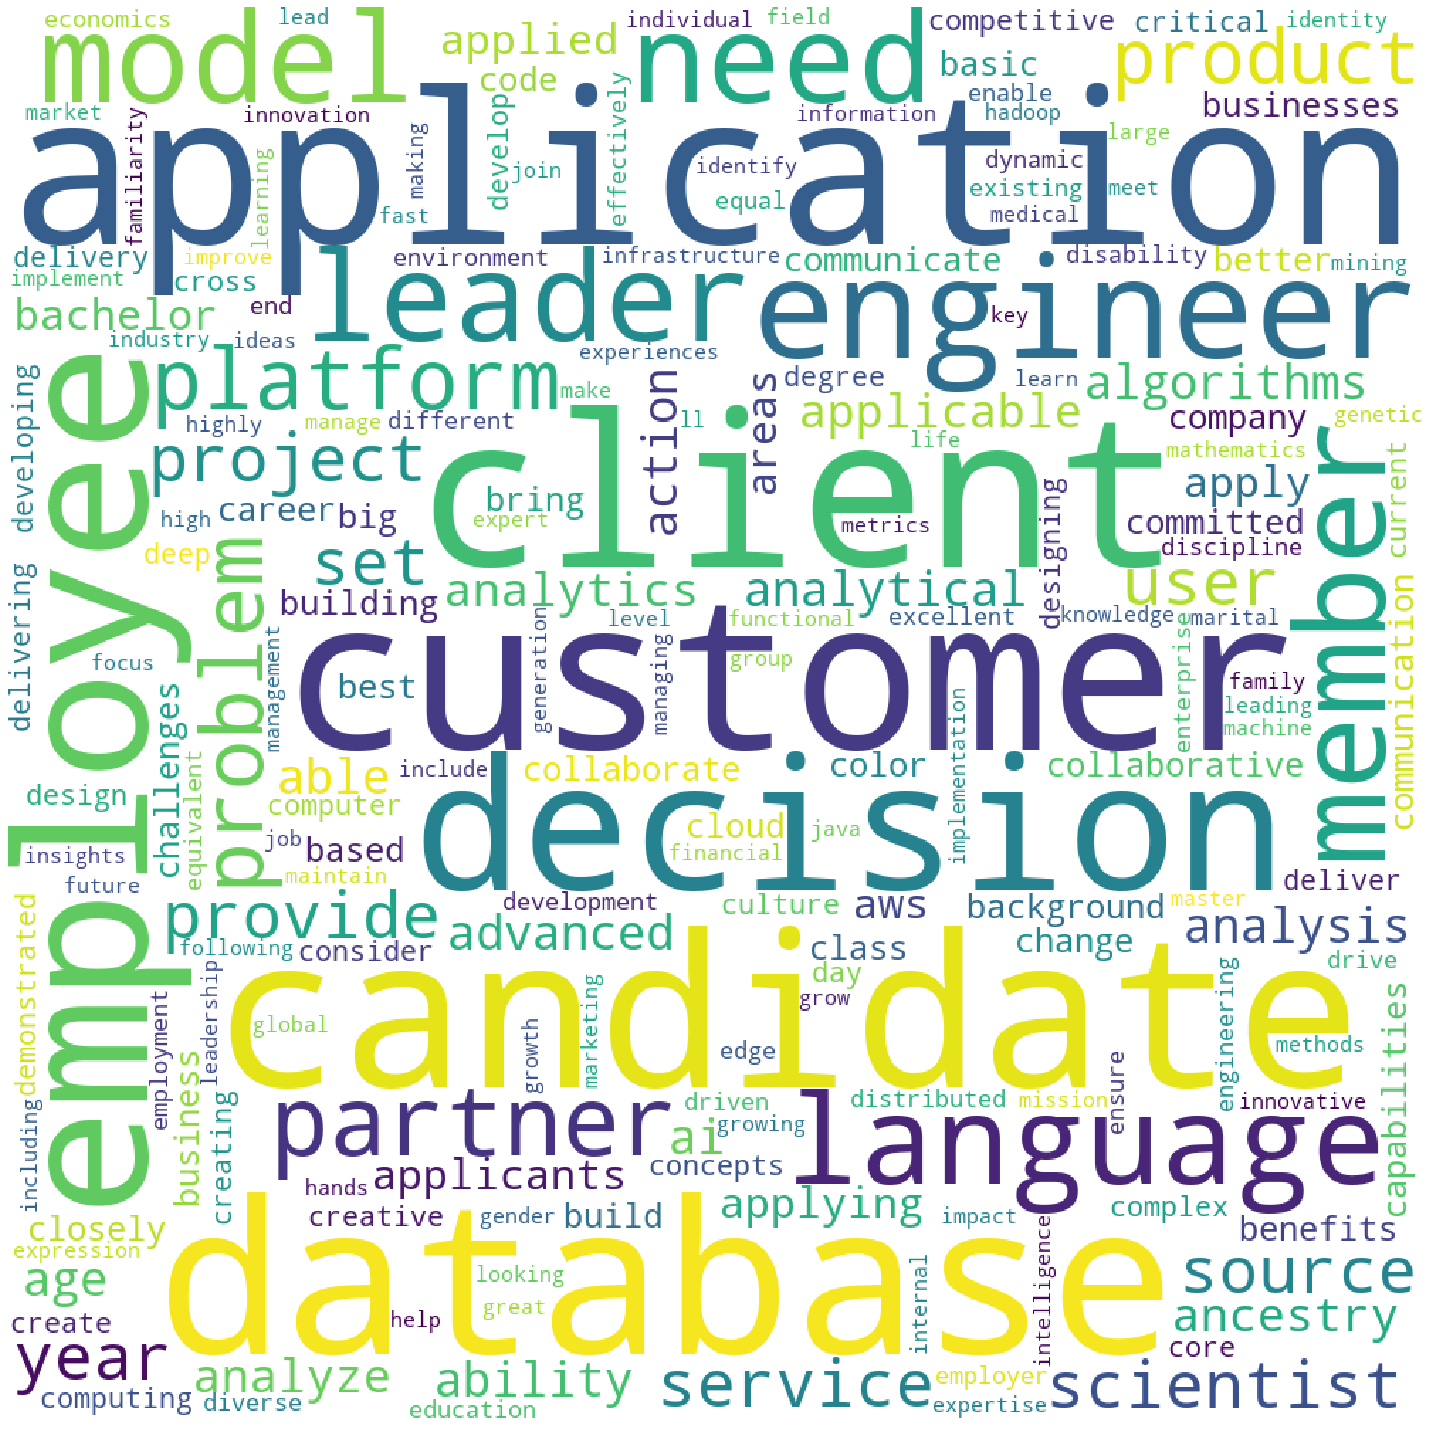

In [94]:
fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(wordcloud)
plt.axis('off')
plt.tight_layout()

In [52]:
count_dict = {word: feature_names_string.count(word) for word in feature_names_string.split()}


In [58]:
sorted(count_dict.items(), key=lambda x: x[1], reverse=True)


[('er', 635),
 ('ed', 364),
 ('ar', 335),
 ('ic', 311),
 ('ve', 283),
 ('ca', 221),
 ('ma', 200),
 ('ll', 194),
 ('il', 165),
 ('ts', 165),
 ('ur', 154),
 ('ci', 139),
 ('ex', 133),
 ('men', 131),
 ('pl', 127),
 ('ad', 121),
 ('ab', 120),
 ('pro', 118),
 ('ut', 114),
 ('com', 112),
 ('id', 109),
 ('ai', 102),
 ('da', 95),
 ('ee', 93),
 ('bi', 89),
 ('ap', 87),
 ('ag', 85),
 ('ir', 80),
 ('pre', 76),
 ('cu', 68),
 ('ba', 67),
 ('era', 67),
 ('ui', 66),
 ('act', 63),
 ('rm', 61),
 ('pi', 60),
 ('ds', 55),
 ('able', 54),
 ('age', 53),
 ('ga', 52),
 ('end', 50),
 ('art', 47),
 ('des', 47),
 ('rate', 44),
 ('wa', 41),
 ('app', 39),
 ('scr', 39),
 ('ms', 37),
 ('sit', 37),
 ('inter', 36),
 ('form', 35),
 ('cs', 34),
 ('log', 33),
 ('eco', 32),
 ('gs', 30),
 ('ph', 29),
 ('fl', 28),
 ('edu', 27),
 ('fin', 26),
 ('ext', 24),
 ('ngs', 24),
 ('lab', 23),
 ('oti', 23),
 ('bs', 22),
 ('script', 22),
 ('led', 21),
 ('met', 21),
 ('use', 21),
 ('sci', 20),
 ('ski', 20),
 ('ability', 19),
 ('car', 19

In [201]:
feature_names_string.count('yoga')

1

{'00': 1,
 '000': 1,
 '001': 1,
 '01': 1,
 '05': 1,
 '07': 1,
 '074': 1,
 '09': 1,
 '10': 1,
 '100': 1,
 '1000': 1,
 '10060': 1,
 '100mm': 1,
 '100ms': 1,
 '101': 1,
 '11': 1,
 '110': 1,
 '1111': 1,
 '12': 1,
 '120': 1,
 '1200': 1,
 '120khealth': 1,
 '13': 1,
 '14': 1,
 '15': 1,
 '150': 1,
 '1500': 1,
 '1550': 1,
 '16': 1,
 '160': 1,
 '16descriptioninnovate': 1,
 '17': 1,
 '170': 1,
 '18': 1,
 '180': 1,
 '185': 1,
 '1869': 1,
 '19': 1,
 '190': 1,
 '190k': 1,
 '1920s': 1,
 '19position': 1,
 '20': 1,
 '200': 1,
 '2009': 1,
 '2012': 1,
 '2017': 1,
 '2018': 1,
 '2019': 1,
 '2019unposting': 1,
 '2020': 1,
 '2021': 1,
 '21': 1,
 '210': 1,
 '21st': 1,
 '23': 1,
 '230': 1,
 '23andme': 1,
 '24': 1,
 '25': 1,
 '250': 1,
 '260': 1,
 '2635': 1,
 '27': 1,
 '28': 1,
 '30': 1,
 '300': 1,
 '3326': 1,
 '35': 1,
 '365': 1,
 '37': 1,
 '3d': 1,
 '3rd': 1,
 '40': 1,
 '401': 1,
 '401k': 1,
 '45': 1,
 '450': 1,
 '50': 1,
 '500': 1,
 '55': 1,
 '5517952': 1,
 '60': 1,
 '600': 1,
 '65': 1,
 '70': 1,
 '7001': 1,

In [41]:
lda = LatentDirichletAllocation(n_components=3, 
                                max_iter=10, learning_method='online', 
                                random_state=0, verbose=True, n_jobs=-1)

In [42]:
lda.fit(tf)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=3, n_jobs=-1,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=True)

In [43]:
# lda.components_

In [44]:
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print('Topic %d:' % (topic_idx))
        print(' '.join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))
        
        
num_top_words=10
display_topics(lda, feature_names, num_top_words)

Topic 0:
model analysis learn skill analytics use research statistical machine scientist
Topic 1:
system position computer equivalent must may require software application include
Topic 2:
product learn new engineering company world team service technical work


['join abb and work in a team that is dedicated to creating a future where innovative digital technology allow greater access to cleaner energy abb abbn six swiss ex is a technology leader that is driving the digital transformation of industry with a history of innovation spanning more than 130 year abb ha four customer focused globally leading business electrification industrial automation motion and robotics discrete automation supported by the abb ability digital platform abb s power grids business will be divested to hitachi in 2020 abb operates in more than 100 country with about 147 000 employee www abb comabb is seeking a data acquisition developer for it broomfield colorado location this role is responsible for designing developing and maintaining of code within our oracle sql server and azure data platform to directly support a complex cloud based customer application this individual will work on a team of talented engineer responsible for the full lifecycle of production soft

In [17]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from nltk.stem import SnowballStemmer

import pyLDAvis
import pyLDAvis.gensim


In [18]:
data_text = df[['Description']].copy()
data_text['index'] = data_text.index
documents = data_text
def lemmatize_stemming(text):
#     return WordNetLemmatizer().lemmatize(text, get_wordnet_pos(text))
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, get_wordnet_pos(text)))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in stopWords_full and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

stemmer = SnowballStemmer('english')
processed_docs = documents['Description'].map(preprocess)

In [27]:
5000*.15

750.0

In [19]:
id2word = gensim.corpora.Dictionary(processed_docs)
# id2word.filter_extremes(no_above=.75, keep_n=5000)
texts = processed_docs
bow_corpus = [id2word.doc2bow(text) for text in texts]


In [25]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=7, id2word=id2word, passes=20, random_state=0)


In [26]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, id2word)
vis

/Users/josh-mantovani/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.061884 -0.060713       1        1  22.164921
0     -0.058619 -0.046576       2        1  20.127693
5      0.007788 -0.028169       3        1  15.986816
1     -0.075382 -0.040303       4        1  14.003404
6     -0.022785 -0.039581       5        1  13.074523
4      0.291271  0.019112       6        1   8.234026
3     -0.080389  0.196232       7        1   6.408612, topic_info=    Category         Freq        Term        Total  loglift  logprob
264  Default  5437.000000      system  5437.000000  30.0000  30.0000
803  Default  2481.000000     equival  2481.000000  29.0000  29.0000
57   Default  5355.000000      comput  5355.000000  28.0000  28.0000
18   Default  1699.000000    ancestri  1699.000000  27.0000  27.0000
191  Default  3601.000000       posit  3601.000000  26.0000  26.0000
..       ...          ...         ...          ...      ...      ...
77    Topic7   349.387238     develop  9137.613281  -0.5164  -5.1805
437   Topic7   302.023071     program  3536.877441   0.2870  -5.3262
167   Topic7   284.789490        must  2934.119629   0.4151  -5.3850
471   Topic7   273.586121  understand  3427.452637   0.2196  -5.4251
758   Topic7   267.205627        user  1607.648682   0.9530  -5.4487

[618 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
4         1  0.143883  acquisit
4         2  0.087825  acquisit
4         3  0.007474  acquisit
4         4  0.087825  acquisit
4         5  0.003737  acquisit
...     ...       ...       ...
297       5  0.132304      year
297       6  0.032845      year
297       7  0.019892      year
5041      4  0.981322      yelp
7946      2  0.977591   âexperi

[1739 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 6, 2, 7, 5, 4])

In [70]:
# df_co['Description'][0]

In [65]:
df[['Job_Title', 'Company', 'Location', 'Number_of_Applicants', 'Description']].head(1)

Job_Title Company            Location  \
Unnamed: 0                                                           
0           Data Acquisition Developer     ABB  Broomfield, CO, US   

                        Number_of_Applicants  \
Unnamed: 0                                     
0           Be among the first 25 applicants   

                                                  Description  
Unnamed: 0                                                     
0           Join ABB and work in a team that is dedicated ...

In [27]:
from gensim import corpora, models
import gensim
from gensim.models import Doc2Vec

In [13]:
cleaned_descriptions

array(['abb dedicate create innovative technology allow great cleaner energy abb abbn six swiss ex drive transformation industry span 130 year abb four globally business electrification industrial automation motion robotics discrete automation support abb platform abb power grid divest hitachi 2020 abb operates 100 country 147 000 employee abb comabb data acquisition developer broomfield colorado develop maintain within oracle sql server azure data platform directly support complex cloud base application individual talented engineer full lifecycle production software application include large data volume data storage system data acquisition transformation analytics primary function position skill experience perform system administration duty 25 responsibilitiessupport result ensure mission critical data collection flow require velocity suite product line continue interruption increase scalability decrease maintenance burden current data acquisition script process communicate collaborat

In [29]:
sentences = gensim.models.doc2vec.TaggedLineDocument(cleaned_descriptions)

In [30]:
doc_model = gensim.models.doc2vec.Doc2Vec(sentences, window=10, min_count=5, iter=20)

TypeError: don't know how to handle uri array(['abb dedicate create innovative technology allow great cleaner energy abb abbn six swiss ex drive transformation industry span 130 year abb four globally business electrification industrial automation motion robotics discrete automation support abb platform abb power grid divest hitachi 2020 abb operates 100 country 147 000 employee abb comabb data acquisition developer broomfield colorado develop maintain within oracle sql server azure data platform directly support complex cloud base application individual talented engineer full lifecycle production software application include large data volume data storage system data acquisition transformation analytics primary function position skill experience perform system administration duty 25 responsibilitiessupport result ensure mission critical data collection flow require velocity suite product line continue interruption increase scalability decrease maintenance burden current data acquisition script process communicate collaborate scrum across team drive quality process contribute grow development platform tool process especially within intelligence support analyst client support team analysis process improvement adhere collaborate continually evolve standardsyour backgroundbachelor degree minimum 3 year related professional experience include experience python sql especially pl sql sql relevant skill master degree minimum 1 related professional experience include experience python sql especially pl sql sql relevant skill additionally could fill senior level meet follow bachelor degree minimum 5 year related professional experience include experience python sql especially pl sql sql relevant skill master degree minimum 3 year related professional experience include experience python sql especially pl sql sql relevant skill must already authorization would permit abb united state carefully weigh optimization reusability script process ensure alteration rewrite add resiliency collection experience object orient design principle pattern degree computer science data science engineering prefer experience source management tool e g git experience use linux command line tool create documentation within support knowledge transfer capable solve problem independently collaborate developer efficiency development practice system administration certification experience linux microsoft plus experience cloud base system azure aws plus javascript knowledge plus etl design methodology include best practice performance tune architecture quick resolution miss data error rare occasion high priority data weekend even require forward think developer drive new process idea adapts change stack experience product driven data model plus experience design development data warehouse plus experience open source enterprise etl monitoring tool plus experience descriptive exploratory data analysis capable extract insightful information data experience apply ml data science project e g feature engineering predictive analytics ml pipeline plus experience bi tool tableau spotfire qlikview power bi plus effective communication product manager data research analyst information software developer database administrator data acquisition developer regular basis remove roadblock learn product process participate software development life cycle utilize agile scrum methodology participation cross project demonstrate solid technical proficiency competency perform variety engineering assignment show independent recognize problem provide input solution requirement gathering analysis activity storyboarding develop case create functional requirement specification contribute estimation effort breakdown task forward think developer drive new process idea adapts change stack player high degree motivationmore usbring sense pride purpose u drive forward fourth industrial revolution create sustainable planet career abb harness power global network collaborate learn world class team challenge let write together abbabb eeo encourage workplace applicant creed ancestry citizen leave veteran information regard eeo right please visit follow website http www1 eeoc gov employer upload eeoc_self_print_poster pdfhttp www1 eeoc gov employer poster cfm http dol gov ofccp regs compliance poster pdf ofccp_eeo_supplement_final_jrf_qa_508c pdfas applicant may request review plan particular abb facility hour 9 00 5 00 p est monday friday contact abb hr representative 1 888 694 7762 veteran individual may request accommodation unable limited abb career site result may request accommodation call abb hr representative 1 888 694 7762 send email u askhr abb com resume application accepted manner grid automation',
       'pilgrim second large chicken producer world operation u puerto rico mexico u k pilgrim process prepares package delivers fresh process value add poultry product sale customer 100 country employ 50 000 people contract 5 200 farmer pilgrim headquarter beautiful greeley colorado jbs usa corporate office 1 200 employee enjoy 300 day sunshine look data scientist manager pilgrim base greeley co corporate office responsibilitiesleverage optimum machine learn technique prediction various unit procurement sale marketing operation etc enhance revenue reduce cost design develop implement end end machine learn production pipeline data exploration data preprocessing feature engineering model building performance evaluation maintain exist setup new machine learn hardware software infrastructure late update collect maintain data local cloud compute platform sap bi hana sql server aws etc setup maintain check check system git hub project present defend finding prediction result method peer executive effective data visualization technique different unit across company understand need identify new prediction opportunity proficiently sql data extraction development comprehensive solution qliksense use qvd csv file data come sap bi fine tune data model qvd data minimize latency thorough understand star schema fact dimension infocubes data mart understand data model need create calculate kay figure input parameter filter reporting component minimal hard cod customizations scalability provide expert statistical guidance suggest appropriate statistical chart graph diagram etc design single glance dashboard executive level comprehend full story recognize understand driver require represent accent within qliksense report create decision make economic marketing calculator tool utilize carious statistical function excel qliksense various analyst design report use minimalist design ui style navigate detailed aggregate report cross functional report minimal mouse click design report data report dissemination download respectively dashboard visualization must come naturally optimum ui ux experience hold high importance gather requirement convert requirement case development ensure report easily scalable modifiable modification undertake end end operation bring data various non jbs external data source end end technical operation entail powershell script relational star schema data model data source mapping sap system csv dat format qliksense qvd file end end process operation entail team collaboration resource management integrate cross functional related data source single source database enable cross functional advanced analysis evaluate data provider evaluate data data analytical tool like eg sa qualification master ph degree apply mathematics computer science software engineering statistic analytics related field three year data science experience prefer verifiable data science immersion program reputable academy online augment academic qualification professional experience experience work sql server qlikview qvd cloud compute database understand carious data model concept relational database star schema highly proficient python sql solid technical skill machine learn regression classification cluster dimensionality reduction deep learn cnn rnn lstm gan time series data anomaly detection statistical algorithm data mining data engineering proficient kera tensorflow optimizers machine learn technique experienced cloud compute run model connect cloud service use tool putty logic problem solve skill demonstrate experience agile rapid development method experience agricultural meat animal husbandry industry plus two three year experience qliksense driven workshop analyze data multiple source aggregate cohesive output m office proficiency sap bi hana knowledge qliksense reporting proficiency eoe f v disabled',
       'denver co relocation offer remote possible shaleappsas data scientist shaleapps sense ambition passion change world shipping production solution use ai data model deep learn applicable get directly data science driven ceo data scientist software engineer define frontier logistics optimization kind person thrives shaleapps member shaleapps success product first foremost position highly entrepreneurial nature hence require candidate develop full picture problem write production develop solution accordingly expect isolated research problem expect others productize need apply highly encourage apply resonate mission value articulate people thrive shaleapps often say hardest ever work achieve level personal professional growth previously imagine possible multiple opening available example project currently need develop novel mechanism optimize payload deliveryimplement ship model predict demand commodity node logistics networkimplement ship model predict availability supply transporter driver commoditiesimplement ship model predict road congestion traffic wait time base historical data demand predictionshere qualification look for3 year experience develop machine learn model inception impact leadership opportunity available experience building use cloud solutionsgreat write verbal communication skill work local remote cross functional membersfluency goexperience python r program languagesdeep understand machine learn technique optimization deep learn reinforcement learn recurrent neural network rnn dynamic bayesian network dbn experience work restful apisexperience work discrete event simulation technique plusadvanced degree quantitative field plusexperience productionizing machine learn model pluscompensationat shaleapps commit develop employee provide excite opportunity grow prosper professional career encourage visit career page read dna culture offer competitive benefit package numerous additional perk include competitive salary cash bonus equity planhealth dental vision insurance401k matchingmodern office space downtown denver bike storage fitness center yoga studio free weight treadmill equipmentrtd pas uber credit parking passdaily breakfast provide addition fresh fruit coffee tea snack throughout dayweekly happy hourhardware choosingshaleapps disclaimer job description design cover contain comprehensive listing activity duty responsibility require duty responsibility activity may change assign',
       ...,
       'data scientist 42766data science usa oldsmar florida data scientist nielsen global measurement data analytics company provide complete trust view available consumer market worldwide nielsen unique measurement technology asset data make one interest challenge place data scientist job responsibility independently write custom python sql learn become expert tv nielsen knowledge focus weight computation enhance methodology support analysis data science team include custom request client inquiry impact change methodology standard best practice learn become expert big data flow nielsen system order create reliable data view feed client inquiry process cross functional team implement validate enhance audience measurement methodology collaboratively create manage project begin end include develop analytical plan run analysis summarize result effectively manage expectation key stakeholder respond client inquiry examine analysis specification completeness determine execute analysis available data modify specification need provide estimate delivery date accurately deliver analysis time summary key insight provide oversight consultation data scientist analyst require qualification master degree statistic social science operation research mathematics computer science outstanding analytical expertise 2 3 year experience one follow python program data manipulation data integration weight sample survey market research trend pattern recognition statistic data aggregation technique automation quality assurance must proficient python spark scala develop sharable software appropriate technical documentation must proficient r sql large scale database detect address quality escape pro actively gather information need independently environment clear concise communication skill proactive communication internal external team include presentation skill set technical report write interpersonal skill effectively influence negotiate communicate within across various level organization able independently extremely organizational skill key task include limited data integration automation examine large volume data identify trend able understand methodology able explain say trend identify methodological process improvement project area may include representation sample bias reduction indirect estimation tbtf 123about nielsenwe tune world watch buying everything think measure sift small stuff piece together big picture provide comprehensive understand happen come next client today data tomorrow marketplace revelation like middle find u 100 country global leader small business consumer good medium company bring data 24 7 possibility endless see next u nielsen career nielsen comnielsen commit hire retain workforce proud make decision expression genetics class job type regularprimary oldsmar floridasecondary location travel yes 5 time',
       'data science director medium 43637data science usa oldsmar floridaas global measurement information believe provide client precise understand consumer key make right decision decision lead profitable growth nielsen always innovate keep pace emerge market trend increasingly demand connect consumer nearly century skilled ever provide complete view consumer watch buy powerful insight clarify relationship content commerce whether client medium consumer package good telecom advertising expansive data measurement capability provide market context confidence long integrity director level position provide support leadership expertise trust technical advisor guide decision make regard platform data science watch product team support tv audio job responsibility solve complex technical issue cloud infrastructure devops challenge platform administration serf key communicator data science team create seamless partnership iterative research lifecycle establish roll standard drive consistency software development deliver best practice recommendation tutorial blog article sample technical presentation customize drive adoption agile sdlc practice distribute team across dsci consult guide automation initiative consistency across data science support cloud migration effort software data storage delivery consult infrastructure design maintenance support dsci operation appdev team process improvement implementation oversee facilitate training adoption tool administration setup technical tool platform represent company technical association contact council technical lead implement orchestration schedule data benchmarking performance management participate evaluation selection hardware software product standard centralize communication ensure cross alignment several tool aws cloud databricks ansible ec2 emr jenkins git s3 etc qualificationsrole requirement e essential p prefer e bachelor degree computer science operation research hard science e g engineering mathematics physic etc p master degree mention field e 6 year experience software development data engineering e 8 year experience e advanced knowledge software design test principle e familiar database management system e familiar relevant operating system communication interface p experience implement automation technique data engineering analytics software e analytic logic proficiency e proficiency python sql e cross functionally energize empower influence level internal external e leadership negotiation people skill e embodies nielsen leadership value e g inclusiveness integrity etc e communication skill verbal write e ass situation quickly act agility p experience data visualization quickly grasp statistical method methodology p proficiency ai ml p experience tableau databricks aws p experience cross functional process improvement hold project lead accountable great project goal e shift hand detailed analysis big picture think customize communication base audience p experience work agile scrum development environment test driven design mvp iterative incremental design familiarity devops concept p devops experience p experience cloud integration nielsennielsen n v nyse nlsn global performance management company provide comprehensive understand consumer watch buy nielsen watch segment provide medium advertising client total audience measurement service across device content video audio text consume buy segment offer consumer package good manufacturer retailer global view retail performance measurement integrate information watch buy segment data source nielsen provide client world class measurement analytics improve performance nielsen p 500 company operation 100 country cover 90 percent world population information visit nielsen comnielsen commit hire retain workforce proud make decision expression genetics class job type regularprimary oldsmar floridasecondary location il chicago ny new york city travel yes 10 time',
       'dutieshelpdutiessummaryclick learn agency button important additional information purpose position involves application research computer science method technique store manipulate transform present information mean computer system requirement apply theoretical foundation computer science design characteristic limitation potential application system math statistical science learn agencyresponsibilities serve computer scientist technical consultant involve application development mathematical statistical computer simulated model application applies mathematical software engineering principle disciple building software system perform various duty concerned application research computer science method technique store manipulate transform present information performs significant software engineering program management duty related system engineering process sep support complex often highly specialized state art software system attends meeting conference briefing seminar related project planning advanced technology support system concept travel requiredoccasional travel may expect travel position supervisory statusnopromotion potential15 job series 1550 computer science requirementshelprequirementsconditions please read public notice entirety prior submit application u citizenship require male must register selective service see ss gov total salary varies depend position pc expense authorize paid iaw jtr air force regulation recruitment incentive may authorize position may subject random drug test may require normal hour include evening weekend holiday shift emergency overtime may require must maintain current certification security clearance may require disclosure political appointment may require serve probationary period per defense authorization act ndaa fiscal fy 2017 section 1111 modifies 5 united state u c 3326 veteran retire within 180 day appointment effective date may require 180 waiver package position subject provision dod priority placement programqualificationsbasic requirement bachelor degree computer science bachelor degree 30 semester hour combination mathematics statistic computer science least 15 30 semester hour must include combination statistic mathematics include differential integral calculus academic degree course must accredit pre accredit institution meeting basic requirement qualifies g 05 position specialized experiencefor g 07 one specialized experience equivalent g 05 level federal service equivalent pay system equip particular knowledge skill ability ksas perform successfully duty position related position fill example experience include develop software system high speed compute system real time data acquisition system simulation model data analysis complex electronic instrumentation system test weapon system installation g 09 one specialized experience equivalent g 07 level federal service equivalent pay system equip particular knowledge skill ability ksas perform successfully duty position related position fill example experience include develop software system high speed compute system real time data acquisition system g 11 one specialized experience equivalent g 09 level federal service equivalent pay system equip particular knowledge skill ability ksas perform successfully duty position related position fill example experience include professional knowledge ability applicable broad range computer software development duty modify standard practice adapt equipment technique solve variety unique novel problem g 12 one specialized experience equivalent g 11 level federal service equivalent pay system equip particular knowledge skill ability ksas perform successfully duty position related position fill example experience include develop software system high speed compute system real time data acquisition system simulation model data analysis complex electronic instrumentation system test weapon system installation serve assistant high grade level scientist subject matter program area g 13 one specialized experience equivalent g 12 level federal service equivalent pay system equip particular knowledge skill ability ksas perform successfully duty position related position fill example experience include develop software system high speed compute system real time data acquisition system simulation model data analysis complex electronic instrumentation system test weapon system installation serve staff specialist significant segment subject matter program provide technical guidance planning coordinate evaluate propose research project program interest agencyfor g 14 one specialized experience equivalent g 13 level federal service equivalent pay system equip particular knowledge skill ability ksas perform successfully duty position related position fill example experience include develop software system high speed compute system real time data acquisition system simulation model data analysis complex electronic instrumentation system test weapon system installation develop apply system evaluation method technique major portion large project study serf staff specialist provide technical leadership guidance major subject matter functional program g 15 one specialized experience equivalent g 14 level federal service equivalent pay system equip particular knowledge skill ability ksas perform successfully duty position related th position fill example experience include develop software system high speed compute system real time data acquisition system simulation model data analysis complex electronic instrumentation system test weapon system installation develop apply system evaluation method technique major portion large project study serf staff expert consultant click follow link view qualification requirement position http opm gov policy data oversight classification qualification general schedule qualification standard url g profclick follow link view occupational requirement position http opm gov policy data oversight classification qualification general schedule qualification standard 1500 computer scienceseries 1550 knowledge skill ability ksas qualification evaluate basis level knowledge skill ability competency follow area knowledge computer science concept principle standard computer science practice method technique perform follow specific instruction routine project minor phase large complex project knowledge computer design simulation program software appropriate software perform routine design analysis assignment knowledge computer science related discipline design develop adapt scientific method technique recommend solution computer problem analyze interpret apply computer science procedure variety situation recommend effective solution part time unpaid experience credit give appropriate unpaid part time must clearly identify duty responsibility position held total number hour per week volunteer experience refers paid unpaid experience include volunteer do service program e peace corp americorps organization e g professional philanthropic religious spiritual community student social volunteer help build critical competency knowledge skill provide valuable training experience translates directly paid credit qualify experience include volunteer experience educationif use education qualify must provide transcript support educational claim education must accredit accredit institution recognize u department education foreign education education complete foreign college university may use meet requirement must show proof education credential deem least equivalent gain conventional u education program responsibility provide evidence apply'],
      dtype='<U11321')